In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 14})
import networkx as nx
import re

In [2]:
url = 'https://raw.githubusercontent.com/dtrihinas/covid-19-cyprus-data/master/coronavirus_cyprus_data.csv'
data = pd.read_csv(url, index_col='caseid')
data.head()

,date,gender,age,nationality,area,impact,profession,hospitalized,ICU,recovered,relation
caseid,,,,,,,,,,,
1,10/03/2020,M,25.0,cypriot,nicosia,travel (italy),NaN,0,0,1,-1
2,10/03/2020,M,64.0,cypriot,nicosia,travel (uk),doctor,0,0,0,-1
3,11/03/2020,M,NaN,cypriot,nicosia,travel (uk),NaN,1,0,0,-1
4,11/03/2020,F,NaN,cypriot,nicosia,travel (uk),NaN,1,0,0,-1
5,11/03/2020,NaN,NaN,cypriot,limassol,travel (italy),NaN,1,0,0,-1


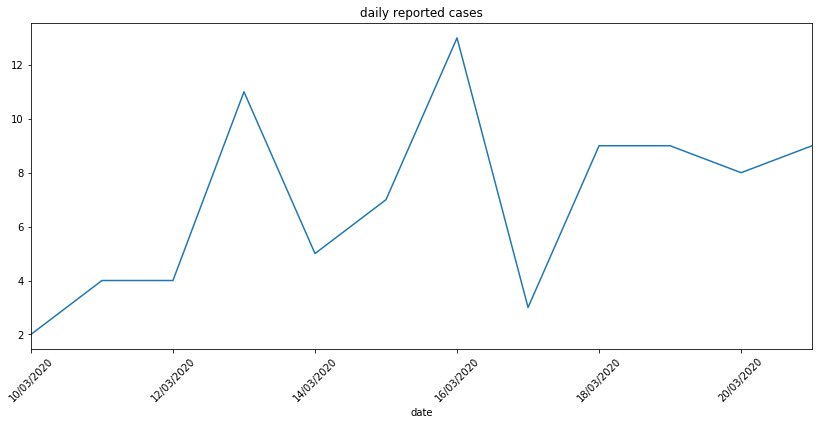

In [3]:
cum_cases = data.groupby('date').size()
cum_cases.plot(figsize=(14,6), title='daily reported cases', rot=45)

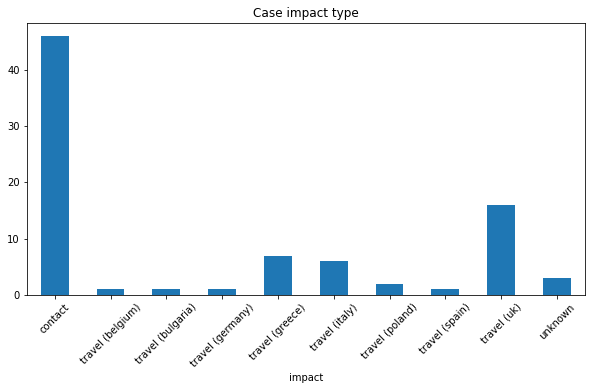

In [4]:
case_impact = data.groupby('impact').size()
case_impact.plot(kind='bar',x='impact',y='cases', title='Case impact type', rot=45, figsize=(10,5))

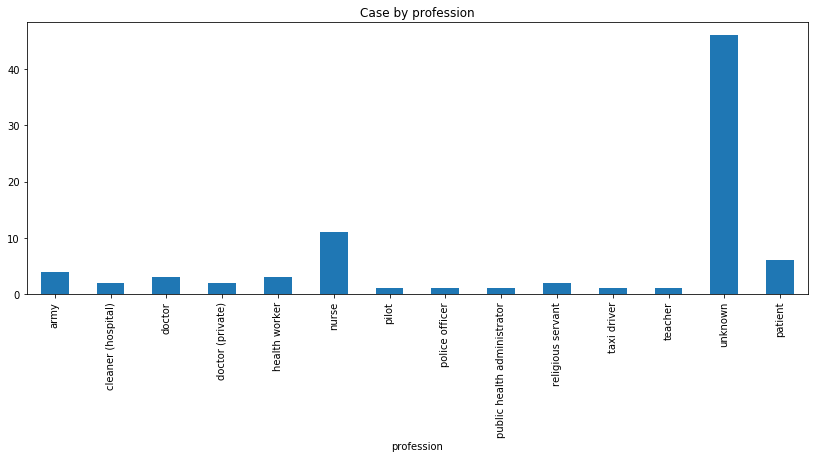

In [5]:
case_profession = data.groupby('profession').size()
unknown_prof = data.index.size - case_profession.sum()
case_profession['unknown'] = unknown_prof
patients = ~case_profession.index.str.extract(r'(^patient)').isna()[0].values #bool array matching patients
total_patient_count = case_profession[patients].sum() #merge patient count from different hospitals
case_profession[patients == True] = np.nan
case_profession = case_profession.dropna()
case_profession['patient'] = total_patient_count
case_profession.plot(kind='bar',x='profession',y='cases', title='Case by profession', rot=90, figsize=(14,5))

In [76]:
g = nx.DiGraph()
g.add_nodes_from(data.index.values)
print(g.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]


In [78]:
def upd_edge_list(lst, tup):
    if isinstance(tup[1], float):
        pass #unknown contact connection
    elif tup[1] == '-1':
        tup = (int(tup[0]), int(tup[0])) #travel cases link to themselves
        lst.append(tup)
    elif '{' in tup[1]:
        x = re.findall(r'[0-9]+', tup[1]) 
        for i in x:
            lst.append((int(tup[0]), int(i))) #link to multiple cases
    else:
        lst.append((int(tup[0]),int(tup[1])))

elist = []

data.apply(lambda row : 
           upd_edge_list(elist, (row.name, row.relation)), 
           axis=1)

elist

[(1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 9),
 (14, 9),
 (15, 15),
 (16, 6),
 (17, 9),
 (18, 9),
 (19, 9),
 (20, 9),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 9),
 (25, 9),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 26),
 (37, 26),
 (38, 26),
 (39, 26),
 (40, 26),
 (40, 26),
 (42, 26),
 (43, 26),
 (44, 26),
 (45, 26),
 (46, 26),
 (47, 35),
 (48, 34),
 (49, 49),
 (50, 50),
 (51, 51),
 (52, 52),
 (53, 26),
 (54, 51),
 (57, 57),
 (59, 61),
 (60, 50),
 (60, 26),
 (61, 26),
 (62, 26),
 (63, 26),
 (65, 65),
 (66, 66),
 (67, 67),
 (70, 26),
 (71, 26),
 (72, 26),
 (73, 11),
 (73, 12),
 (79, 26),
 (80, 80),
 (81, 81),
 (82, 82),
 (83, 83),
 (84, 84)]

In [80]:
g.add_edges_from(elist)
nx.draw(g, with_labels = True, pos=nx.spring_layout(g))
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-80-a211c814be21>, line 2)